In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer , add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
from lowEBMs import update_plotstyle, constants
from lowEBMs.Packages.Optimization import *
import matplotlib
update_plotstyle()
#from lowEBMs.Packages.Functions import asd

ImportError: cannot import name 'constants'

In [20]:
configdic=importer('Development_config.ini')
variable_importer(configdic,True,accuracy_number=500,accuracy=0.01)
configdic1,paras=add_sellersparameters(configdic,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
controldata=controlrun(configdic)
variable_importer(configdic,False)

Vars.T=controldata[1][-1]
Vars.T_global=controldata[2][-1]
Vars.t=controldata[0][-1]

outputdata=rk4alg(model_equation,configdic1['eqparam'],configdic1['funccomp'])


Loading Configuration from: Development_config.ini
Starting controlrun with a temperature accuracy of 0.01 K on the GMT over 500 datapoints.
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Transit State within 17.901806354522705 seconds
Simulation finished within 17.911991119384766 seconds
Finished controlrun over 27.394520547945206 years. Runtime: 17.917049884796143 s
Starting simulation...


Simulation finished within 6.030370712280273 seconds


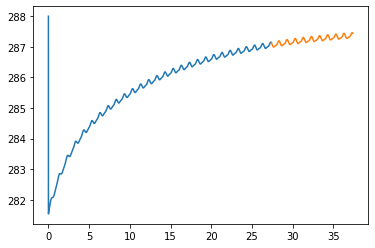

In [21]:
plt.plot(controldata[0]/(60*60*24*365),controldata[2])
plt.plot(outputdata[0]/(60*60*24*365),outputdata[2])#[:,0])
#plt.ylim(-1,1)
#print(out[1][:,1])

In [4]:
#configCTRL=importer('Testing_AOD.ini')
#variable_importer(configCTRL,False)
#CTRL=np.array(controlrun(configCTRL))
configCTRL1=importer('Testing_RF.ini')
variable_importer(configCTRL1,False)
CTRL=rk4alg(model_equation,configCTRL1['eqparam'],configCTRL1['funccomp'])
#print(Vars.AOD)

Loading Configuration from: Testing_RF.ini
0D
Starting simulation...


Simulation finished within 5.78976583480835 seconds


In [13]:
configSBFCTRL=importer('../../Simulations/Config/1D/Controls/TSI_Steinhilber_850_1850_CTRL.ini')
variable_importer(configSBFCTRL,False)#,accuracy_number=2000,accuracy=1e-4)
configSBFCTRL,ParasCTRL=add_sellersparameters(configSBFCTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
SBF_CTRL=controlrun(configSBFCTRL)

Loading Configuration from: ../../Simulations/Config/1D/Controls/TSI_Steinhilber_850_1850_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 36.11196708679199 seconds
Finished controlrun over 60.0 years. Runtime: 36.1133246421814 s


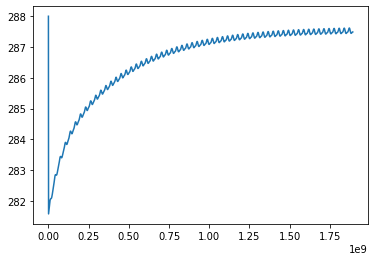

In [15]:
plt.plot(SBF_CTRL[0],SBF_CTRL[2])

In [22]:
configTSI_SBF=importer('TSI_Steinhilber_850_1850.ini')
variable_importer(configTSI_SBF,False)#,accuracy_number=2000,accuracy=1e-4)
configTSI_SBF,ParasTSI_SBF=add_sellersparameters(configTSI_SBF,parameterinterpolatorstepwise,'SellersParameterization.ini',2,3,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=SBF_CTRL[1][-1],SBF_CTRL[2][-1]
TSI_SBF=rk4alg(model_equation,configTSI_SBF['eqparam'],configTSI_SBF['funccomp'])

Loading Configuration from: TSI_Steinhilber_850_1850.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


Simulation finished within 613.2324333190918 seconds


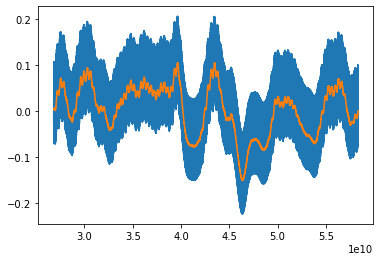

In [23]:
zero=np.mean(SBF_CTRL[2][-36:])
plt.plot(TSI_SBF[0],TSI_SBF[2]-zero)
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer
plt.plot(TSI_SBF[0],moving_average(TSI_SBF[2]-zero, 36))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars,reset
from lowEBMs.Packages.Functions import plotmeanstd
#from plotstyle import main
import matplotlib
#main()
matplotlib.rcParams['lines.linewidth']=1.1
time_sec_year=60*60*24*365
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [2]:
CTRL1Ddat=np.transpose(np.genfromtxt('Dev_Data/1DControlData.txt',delimiter=',',dtype='unicode',unpack=True))
CTRL1D={}
for i in CTRL1Ddat:
    valuearray=np.zeros(len(i[1:]))
    for j in range(len(i)-1):
        valuearray[j]=round(float(i[j+1]),4) 
    CTRL1D[i[0]] =valuearray

In [2]:
configCTRLVolc1D_Transon_Annoff=importer('Dev_Data/Volcanic_CTRL_Transferon_Annoff.ini')
variable_importer(configCTRLVolc1D_Transon_Annoff,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D_Transon_Annoff,ParasCTRL=add_sellersparameters(configCTRLVolc1D_Transon_Annoff,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
#Vars.T=CTRL1D['Volc']
CTRLVolc1D_Transon_Annoff=rk4alg(model_equation,configCTRLVolc1D_Transon_Annoff['eqparam'],configCTRLVolc1D_Transon_Annoff['funccomp'])
#CTRLVolc1D_Transon_Annoff_Export=np.mean(CTRLVolc1D_Transon_Annoff[1][-int((365/5)*10):],axis=0)
#np.savetxt('Data/ControlData/1D/Volc_CTRL.txt',VolcCTRL0VolcCTRL1D_ExportD_Export,delimiter=',')

Loading Configuration from: Dev_Data/Volcanic_CTRL_Transferon_Annoff.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


/Home/siv32/bsc029/Desktop/Internship_Workspace/Model/Low-dimensional-EBMs/lowEBMs/Packages/Functions.py:816: RuntimeWarning: overflow encountered in power
  R_out=-grey*sigma*Vars.T**4*(1-m*np.tanh(gamma*Vars.T**6))
/Home/siv32/bsc029/Desktop/Internship_Workspace/Model/Low-dimensional-EBMs/lowEBMs/Packages/Functions.py:2734: RuntimeWarning: overflow encountered in square
  e=e0*(1-0.5*eps*L*Vars.tempdif/(Rd*Vars.T[1:]**2))
/Home/siv32/bsc029/Desktop/Internship_Workspace/Model/Low-dimensional-EBMs/lowEBMs/Packages/Functions.py:2789: RuntimeWarning: overflow encountered in square
  dq=eps**2*L*e*Vars.tempdif/(p*Rd*Vars.T[1:]**2)
/Home/siv32/bsc029/Desktop/Internship_Workspace/Model/Low-dimensional-EBMs/lowEBMs/Packages/Functions.py:1336: RuntimeWarning: overflow encountered in multiply
  C=(Vars.meridional*Vars.T[1:]-K_h*factor_kair*(Vars.tempdif/(dy)))*(cp*dp*const.mb_to_Pa/g)*factor_air


KeyboardInterrupt: 

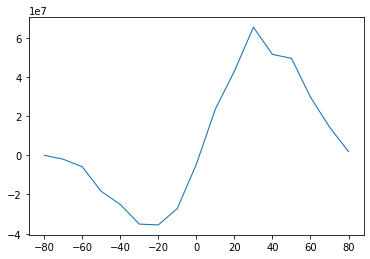

In [26]:
#plt.plot(CTRLVolc1D_Transon_Annoff[0],CTRLVolc1D_Transon_Annoff[2]-273.15)
#plt.plot(Vars.Lat2,Vars.Read['F'][-1])
#for i in range(1,10):
#plt.plot(Vars.Lat2,Vars.Read['C'][-1])
#plt.plot(Vars.Lat2,Vars.Read['cL'][10])
#plt.plot(Vars.Lat,Vars.Read['Transfer'][-1])

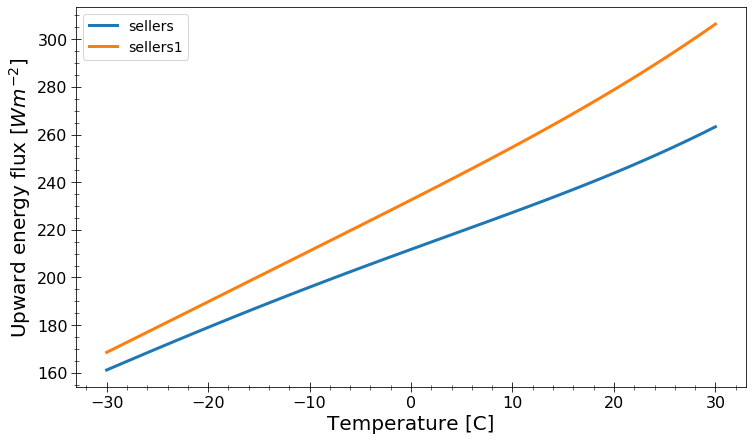

In [35]:
plt.figure(figsize=(12,7))
T=np.linspace(-30,30,60)
#g=1.15e-10
sb=0.612*5.67e-8*(T+273.15)**4

m=0.5
gamma=1.9e-15
s=5.67e-8*(T+273.15)**4*(1-m*np.tanh(gamma*(T+273.15)**6))
m1=0.4
gamma1=1.9e-15
s1=5.67e-8*(T+273.15)**4*(1-m1*np.tanh(gamma1*(T+273.15)**6))

bc=(230.31)+(2.2274+0.3)*T-0.5*((3.0*15.91)+(0.1*15.91)*T)

b_fit=(195)+(3)*T

#b_fit=(190)+(3.2)*T

plt.plot(T,s,label='sellers')
plt.plot(T,s1,label='sellers1')
#plt.plot(T,b_fit,label='budyko_fitted')
#plt.plot(T,bc,label='budykoc')
#plt.plot(T,sb,label='SB')
plt.xlabel('Temperature [C]'), plt.ylabel('Upward energy flux [$Wm^{-2}$]')
#print((s[50]-s[45])/(T[50]-T[45]))
#print((sb[50]-sb[45])/(T[50]-T[45]))
plt.legend(fontsize=14)
#plt.savefig('OutgoingRadiation_Comparison.eps',format='eps',bbox_inches='tight')

In [124]:
def insolation_self(Lat_in,Days_in,orb={'ecc': 0.017236, 'long_peri': 281.37, 'obliquity': 23.446},S0=1366.14):
        degrad=np.pi/180
        if type(Days_in)==np.ndarray and type(Lat_in)==np.ndarray:
            Lat=np.tile(Lat_in,(len(Days_in),1))
            Days=np.transpose(np.tile(Days_in,(len(Lat_in),1)))
        else:
            Lat=Lat_in
            Days=Days_in
        ecc = orb['ecc']
        long_peri = orb['long_peri']
        obliquity = orb['obliquity']

        phi=Lat*degrad
        long_peri_rad = long_peri*degrad
        delta_lambda = (Days - 80.) * 2*np.pi/365
        beta = np.sqrt(1-ecc**2)

        lambda_long_m = -2*((ecc/2 + (ecc**3)/8 ) * (1+beta) * np.sin(-long_peri_rad) -
                (ecc**2)/4 * (1/2 + beta) * np.sin(-2*long_peri_rad) + (ecc**3)/8 *
                (1/3 + beta) * np.sin(-3*long_peri_rad)) + delta_lambda

        lambda_long = ( lambda_long_m + (2*ecc - (ecc**3)/4)*np.sin(lambda_long_m - long_peri_rad) +
                (5/4)*(ecc**2) * np.sin(2*(lambda_long_m - long_peri_rad)) + (13/12)*(ecc**3)
        * np.sin(3*(lambda_long_m - long_peri_rad)) )

        delta = np.arcsin(np.sin(degrad*obliquity) * np.sin(lambda_long))
        np.seterr(invalid='ignore')
        Ho = np.where( abs(delta)-np.pi/2+abs(phi) < 0.,np.arccos(-np.tan(phi)*np.tan(delta)),
                    np.where(phi*delta>0., np.pi, 0. ))
        coszen = Ho*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(Ho)

        Fw = S0/np.pi*( (1+ecc*np.cos(lambda_long -degrad*long_peri))**2 / (1-ecc**2)**2 * coszen)
    
        return Fw

0.0025949478149414062 0.016051769256591797


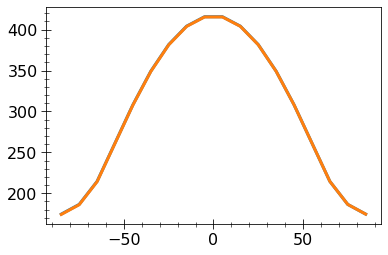

In [140]:
from climlab.solar.insolation import daily_insolation
from time import time
Lat=np.linspace(-85,85,18)
Days=np.arange(365)
insol=[]
#orb={'ecc': 0.57236, 'long_peri': 290.37, 'obliquity': 28.446}

self_start=time()

insol_mean=np.mean(insolation_self(Lat,Days),axis=0)
self=time()-self_start

clim_start=time()
clim_mean=np.mean(daily_insolation(Lat,Days),axis=1)
clim=time()-clim_start

print(self,clim)
plt.plot(Lat,insol_mean)
plt.plot(Lat,clim_mean)

In [98]:
x=np.arange(10)
print(x)
y=np.tile(x,(5,1))
print(y)

[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


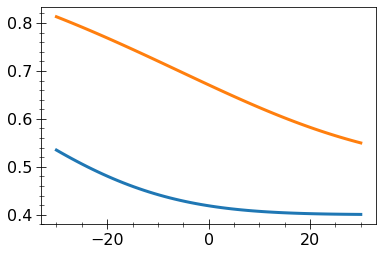

In [46]:
plt.plot(T,(1-0.6*np.tanh(5e-15*(T+273.15)**6)))
plt.plot(T,(1-0.5*np.tanh(1.9e-15*(T+273.15)**6)))

In [9]:
config_base=importer('Dev_Data/Daily.ini')
variable_importer(config_base)
config_base,ParasCTRL=add_sellersparameters(config_base,\
                                    parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
data=rk4alg(model_equation,config_base['eqparam'],config_base['funccomp'])

Loading Configuration from: Dev_Data/Daily.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


[-1.02732006e-05 -1.88695505e-05 -1.31354873e-05 -8.64532263e-06
 -5.91022344e-06 -1.99170289e-06  1.63396846e-05  2.53682777e-05
 -5.06237624e-05 -1.44801661e-04  1.94093662e-04  2.47032760e-05
 -3.92955826e-07 -1.32454954e-05 -1.05628037e-05 -8.65835914e-06
 -1.23922529e-05  1.40625822e-05]
[-0.14793409 -0.27172153 -0.18915102 -0.12449265 -0.08510722 -0.02868052
  0.23529146  0.3653032  -0.72898218 -2.08514392  2.79494873  0.35572717
 -0.00565856 -0.19073513 -0.15210437 -0.12468037 -0.17844844  0.20250118]
[-7.98885464e-05 -4.24187140e-05 -6.94761588e-05 -3.25739370e-05
 -2.75080463e-05 -1.06895610e-04 -5.19269056e-05 -1.35000541e-03
  1.10183384e-02 -3.49051143e-02  2.79330352e-02 -1.72413831e-03
 -6.62671098e-05 -3.36101561e-05 -3.40817488e-05 -3.74854029e-05
 -7.99933555e-05 -5.77081425e-05]
[-1.15039507e+00 -6.10829481e-01 -1.00045669e+00 -4.69064693e-01
 -3.96115867e-01 -1.53929678e+00 -7.47747441e-01 -1.94400779e+01
  1.58664073e+02 -5.02633645e+02  4.02235707e+02 -2.48275917e+

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan n

KeyboardInterrupt: 

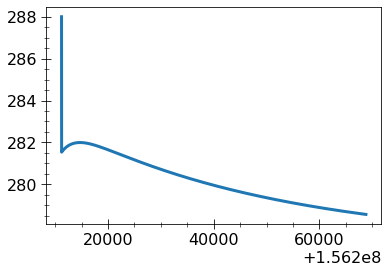

In [8]:
plt.plot(data[0]/365,data[2])

In [7]:
#setup={'number_of_parameters': num_params, 'number_of_cycles': 1, 'number_of_parallels': int(num_params*2+1)}
labels=[['eqparam','c_ao'],['func1','m'],['func1','gamma'],['func3','f'],['func2','factor_oc'],['func2','factor_kwv'],['func2','factor_kair']]
P=[2.83462504e+08, 4.88149135e-01, 2.20442021e-15, 3.11485364e+00,
 1.16514779e+00, 1.16502961e+00, 1.16531060e+00]
P1=[2.89960046e+08, 4.86558290e-01, 2.23471147e-15, 2.87421838e+00,
 1.16516860e+00, 1.16503419e+00, 1.16536038e+00]
config_CTRL=importer('Dev_Data/Optimization/Volcanic_Sellers_CTRL_Offset.ini')
variable_importer(config_CTRL,initialZMT=True,parallel=False)
config_CTRL,ParasCTRL=add_sellersparameters(config_CTRL,\
                                        parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
config_CTRL=add_parameters(config_CTRL,P,labels)
data_CTRL=rk4alg(model_equation,config_CTRL['eqparam'],config_CTRL['funccomp'],progressbar=True)
ZMT,GMT=data_CTRL[1][-1],data_CTRL[2][-1]

config_base=importer('Dev_Data/Optimization/Volcanic_Sellers_Offset.ini')
variable_importer(config_base,initialZMT=False)
config_base,ParasCTRL=add_sellersparameters(config_base,\
                                    parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
config=add_parameters(config_base,P,labels)
Vars.T,Vars.T_global=ZMT,GMT   
data=rk4alg(model_equation,config['eqparam'],config['funccomp'],progressbar=True)

Loading Configuration from: Dev_Data/Optimization/Volcanic_Sellers_CTRL_Offset.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini



Loading Configuration from: Dev_Data/Optimization/Volcanic_Sellers_Offset.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


In [3]:
Year_volc, CWL_GMT,  EVA_GMT, CWLcorr_GMT=np.genfromtxt('Data/Volc_800_2000.txt',skip_header=1,unpack=True)
#Year_NorESM, SO4_FORC, SAT_GISS, SAT_VOLC, SAT_ZERO, SAT_AFIT, SAT_TREN= \
#np.genfromtxt('Data/NorESM_Pinatubo_GMST_response.txt',skip_header=1,unpack=True)
Year_volc_1800_1850=Year_volc[int(1000*365/4):int(1040*365/4)]
Year_volc_1808_1858=Year_volc[int(1008*365/4):int(1048*365/4)]
EVA_GMT_1800_1850=EVA_GMT[int(1000*365/4):int(1040*365/4)]
EVA_GMT_1808_1858=EVA_GMT[int(1008*365/4):int(1048*365/4)]
Lat_10,ZMT_10=np.loadtxt('Data/ERA_ZMT_Mean_10deginterpolated.txt')

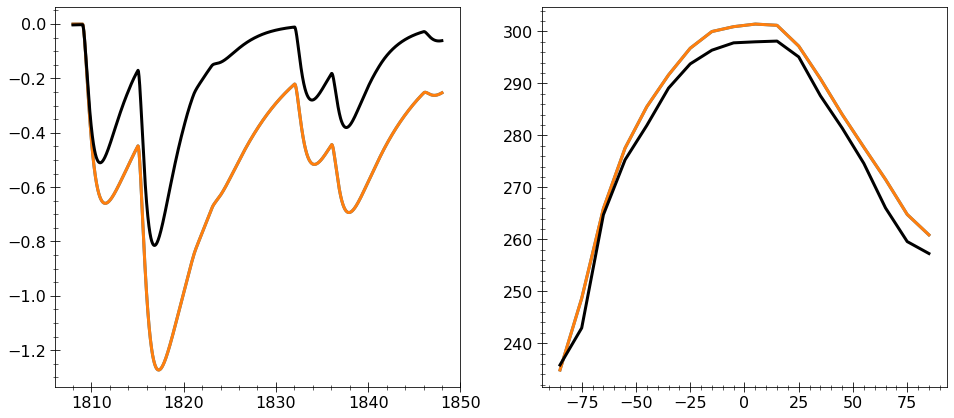

In [8]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
ax[0].plot(data[0]/constants.time_sec_year,data[2]-data[2][0])
ax[0].plot(data1[0]/constants.time_sec_year,data1[2]-data1[2][0])
ax[0].plot(Year_volc_1808_1858,EVA_GMT_1808_1858,c='k')

elevation=-0.0065*np.array(ParasCTRL[1][1])
ax[1].plot(Vars.Lat,data[1][0]+elevation)
ax[1].plot(Vars.Lat,data1[1][0]+elevation)
ax[1].plot(Lat_10,ZMT_10,c='k')

plt.savefig('Coupled_Optimization.eps',format='EPS')

In [20]:
x=[0,0,0]
def check(y):
    if y==0:
        return True
    else:
        return False
if all(check(x[i]) for i in range(3)):
    print('out')

out


In [4]:
x=np.array([[2,2],[2,2],[2,2]])
print(x)
x=np.transpose(x)
print(x)

[[2 2]
 [2 2]
 [2 2]]
[[2 2 2]
 [2 2 2]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer 
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation

In [2]:
configdic=importer('EBM0D_simple_config.ini',path='../../Model')
eq=configdic['eqparam']
rk=configdic['rk4input']
fun=configdic['funccomp']
variable_importer(configdic)
Time,ZMT,GMT=rk4alg(model_equation,eq,rk,fun)

Loading Configuration from: ../../Model
0D


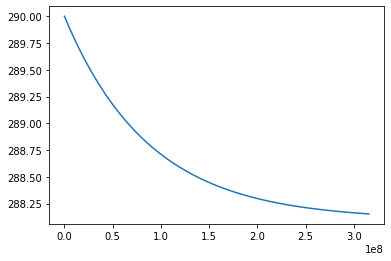

In [3]:
plt.plot(Time,GMT)